<div class="alert alert-block alert-info">
<h2>6. Structured Data: pandas DataFrames</h2><br><br>
</div>

In [1]:
# pandas provide 2 data structures - Data Frames and Data Series.
# pandas Data Frames are similar to Excel sheets. 
# They are 2-dimensional structures with columns that can hold different data types, e.g. strings and numbers.
# If you recall our PyClass 2, by contrast, Numpy arrays can hold only one type of data. Numpy works best with numbers alone.

In [2]:
# pandas Data Series is a single column of pandas Data Frames, while you may treat pandas Data Frames as a collection of Series.


In [3]:
# Let's hand code a dictionary which then we'll turn into a pandas Data Frame.

# Let's have one numeric value set to None in the age category.

myDict = {'name': ['John', 'Sue', 'Avni', 'Alina', 'Marta', 'Frodo'], 
          'age':[25, 15, 34, 21, 40, None], 
          'country': ['USA', 'Ireland', 'India', 'Poland','Italy', 'Shire']
         }

# Print out your variable.

myDict

{'name': ['John', 'Sue', 'Avni', 'Alina', 'Marta', 'Frodo'],
 'age': [25, 15, 34, 21, 40, None],
 'country': ['USA', 'Ireland', 'India', 'Poland', 'Italy', 'Shire']}

In [4]:
# To turn your dictionary into a pandas Data Frame, you need to import the pandas library into your working environment.

import pandas as pd
import numpy as np


# Now  create a variable myDF in which you'll store a dictionary converted into a data frame. 
# The pandas method DataFrame()does the conversion.

# Pass the argument dtype=int, or dtype=object to prevent the conversion of the arbitrary integers of myDict to floats. 


myDF = pd.DataFrame(myDict, dtype=int)

myDF

,name,age,country
0,John,25,USA
1,Sue,15,Ireland
2,Avni,34,India
3,Alina,21,Poland
4,Marta,40,Italy
5,Frodo,None,Shire


In [5]:
# We need to clean our data. If there are empty cells, they have to be removed as follows:

myDF = myDF.dropna(axis=0)

myDF

# The row that contains info on Frodo is removed.
# This method will remove all row if any of the cells is empty.

,name,age,country
0,John,25,USA
1,Sue,15,Ireland
2,Avni,34,India
3,Alina,21,Poland
4,Marta,40,Italy


In [6]:
# To remove the entire column, specify the name of the column and set the value of argument axis to 1.

myDF1 = myDF.drop(['country'], axis=1)

myDF1

,name,age
0,John,25
1,Sue,15
2,Avni,34
3,Alina,21
4,Marta,40


In [7]:
# You may rearrange the order of columns.

cols=['name', 'country', 'age']

myDF=myDF[cols]

myDF

,name,country,age
0,John,USA,25
1,Sue,Ireland,15
2,Avni,India,34
3,Alina,Poland,21
4,Marta,Italy,40


<div class="alert alert-block alert-danger">
<h1>Over to You</h1>
<p>Now add one more row with append() and one more column with assign(). We learnt how to do it in PyClass 2.</p>
<p>Name the new column 'score' and assign any values between 0 and 10.</p>
<p>Store your expanded data frame in a variable called 'newDF'.<p>
</div>

In [8]:
# One more way to add a new column to the existing Data Frame:

myDF2 = myDF.assign(height=[171, 150, 166, 188, 175])

myDF2

,name,country,age,height
0,John,USA,25,171
1,Sue,Ireland,15,150
2,Avni,India,34,166
3,Alina,Poland,21,188
4,Marta,Italy,40,175


In [9]:
# If you want to delete some rows, you do so by their index position, while columns can be deleted by column names.

# Both rows and columns can be deleted with the in-built function drop().

# Let's delete the first row that contains info on John who is 25 years old and is from the US.

myDF2= myDF2.drop([0])

myDF2

,name,country,age,height
1,Sue,Ireland,15,150
2,Avni,India,34,166
3,Alina,Poland,21,188
4,Marta,Italy,40,175


In [10]:
# You can reset the index to run from 0.

# To avoid the old index being added as a column, use the drop parameter.

myDF2.reset_index(drop=True)


,name,country,age,height
0,Sue,Ireland,15,150
1,Avni,India,34,166
2,Alina,Poland,21,188
3,Marta,Italy,40,175


In [11]:
# You can rearrange the table by the data type that you find most important for your work.

ageDF = myDF2.groupby('age').sum()

ageDF

# This method will sort your numerical data by increasing order or textual data by alphabetical order

# Enter 'country' instead of 'age' to see how it works on textual data

,height
age,
15,150
21,188
34,166
40,175


In [12]:
# Similarly, you may use sort_values() method to sort the values within a column without regrouping columns.

myDF2.sort_values('height')

# If you pass 'name' or 'country' as the argument, the data in those columns will be arranged alphabetically.

,name,country,age,height
1,Sue,Ireland,15,150
2,Avni,India,34,166
4,Marta,Italy,40,175
3,Alina,Poland,21,188


In [13]:
# Like with Numpy, we can do statistical modelling with pandas.

# mean() will return the average received from adding up all values and dividing the sum by the number of those values.
# It will return the average per each column if only a column contains numeric values.

# Select the subset of myDF2 that contains numbers, e.g. the columns 'age' or 'height'.

myDF2['height'].mean()


169.75

In [14]:
# You may get more general summary with the pandas function describe().

myDF2.describe()

,height
count,4.00000
mean,169.75000
std,15.96611
min,150.00000
25%,162.00000
50%,170.50000
75%,178.25000
max,188.00000


In [15]:
# We may also select a subset 'age' and other columns to be summarized as follows:

myDF2.age.describe()

count      4
unique     4
top       15
freq       1
Name: age, dtype: int64

In [16]:
# You can use different operators (e.g. >, <, and) to filter data.

# Filter only those people who are above 20.

myDF2[myDF2['age'] > 20]

,name,country,age,height
2,Avni,India,34,166
3,Alina,Poland,21,188
4,Marta,Italy,40,175


In [17]:
# Now see who is younger than 20.

myDF2[myDF2['age'] < 20]

,name,country,age,height
1,Sue,Ireland,15,150


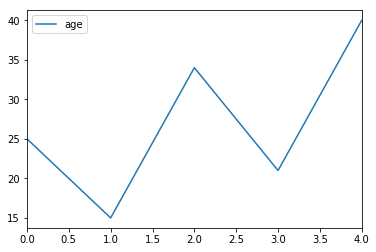

In [18]:
# We'll do visualization with the matplotlib library next week. Yet let's try to get our first visual beforehand.
# We'll use the functionality of plot() which is a simple wrapper around the matplotlib libraries plt.plot() method.

# To be able to generate visuals in the IPython environment, we need to use the magic line starting with % as below:

%matplotlib inline 

# Now all we need is to call the myDF variable we created earlier to produce the basic line graph.

# Since the columns 'name' and 'country' contain textual data, they won't be plotted.

dfLine = pd.DataFrame(myDF)

myDF.plot()

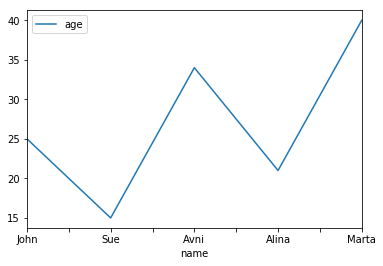

In [19]:
# The above visual is not efficient because it does not have names plotted along the x-axis.

myDF.plot(x='name')

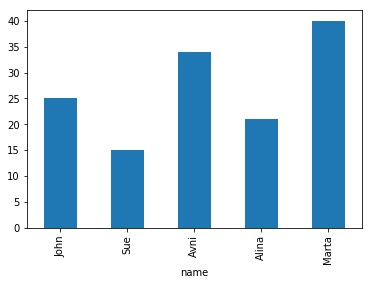

In [20]:
# It's very important to choose the right type of graph to summarize your data. 
# A bar chart seems to be a better choice than a line graph in this case.
# All you need to do is to add the function keyword 'bar' after 'plot.'.

myDF.plot.bar(x='name', legend=None)

# legend=None will remove the legend inside your plot

In [21]:
# Now plot myDF2 which contains two columns with numerical data as lines and bars

<div class="alert alert-block alert-warning">
    <p>Check the following links for more advanced pandas methods for Excel files:</p><br>
    <p> https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/</p>
    <p>https://thispointer.com/data-analysis-in-python-using-pandas/</p>
<div>

<div class="alert alert-block alert-danger">
<h1>Over to You</h1>
<p>Plot the numeric data from both the columns of the variable newDF as line and bar graphs.</p>
<p>Then produce a stacked bar chart by passing the argument 'stacked=True' inside the bar() function.</p>
    
<h4>Below is the list of other plotting methods:</h4>

<ul>
<li>‘bar’ or ‘barh’ for bar plots</li>
<li>‘hist’ for histogram</li>
<li>‘box’ for boxplot</li>
<li>‘kde’ or ‘density’ for density plots</li>
<li>‘area’ for area plots</li>
<li>‘scatter’ for scatter plots</li>
<li>‘hexbin’ for hexagonal bin plots</li>
<li>‘pie’ for pie plots</li>
</ul>

</div>

<div class="alert alert-block alert-success">
<h1>Over to You</h1>
<ul><li>Find some structured data published online in a csv format. It should be different from the data you used in your PyClass2 homework.</li>
<li>Clean the data if necessary, e.g. remove rows with missing data.</li>
<li>Produce line, bar, and  histogram plots mapping either all your data or its subsets. </li>
<li>Use comments in the code cells to document what you do.</li>
<li>Save your Jupyter Notebook as 'Lesson6.ipynb' and zip it with the Excel file that you downloaded from an external link in the file called 'Homework6.zip'.</li></ul><br>
<h3>Submit the zipped file via the designated area on KEATS by 4pm on Thursday 23rd January 2020.</h3>
</div>